<a href="https://colab.research.google.com/github/Ariqueeezz/Personal_Data_Science_Projects/blob/main/RTI/MentalHeatlhInTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries***

In [41]:
# Untuk memanipulasi data
import pandas as pd
import re
import numpy as np

# Untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Oversampling
from imblearn.combine import SMOTEENN
from collections import Counter

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from scipy.stats import randint, uniform

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Data Loading***

In [42]:
df_2014 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2014.csv")
df_2016 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2016.csv")
df_2017 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2017.csv")
df_2018 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2018.csv")
df_2019 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2019.csv")
df_2020 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2020.csv")
df_2021 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2021.csv")
df_2022 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2022.csv")
df_2023 = pd.read_csv("/content/drive/MyDrive/dataset/osmi/2023.csv")

# ***EDA (Exploratory Data Analysis)***

In [43]:
print(" OSMI Survei 2014 ".center(50, "="))
print(df_2014.head()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2016 ".center(50, "="))
print(df_2016.head()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2017 ".center(50, "="))
print(df_2017.head()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2018 ".center(50, "="))
print(df_2018.head()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2019 ".center(50, "="))
print(df_2019.head()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2020 ".center(50, "="))
print(df_2020.head()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2021 ".center(50, "="))
print(df_2021.head()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2022 ".center(50, "="))
print(df_2022.head()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2023 ".center(50, "="))
print(df_2023.head()) # Menampilkan 5 Data paling atas

================ OSMI Survei 2014 ================
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy     

In [44]:
print(" OSMI Survei 2014 ".center(50, "="))
print(df_2014.info()) # Menampilkan seluruh informasi tentang data
print("\n" + " OSMI Survei 2016 ".center(50, "="))
print(df_2016.info()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2017 ".center(50, "="))
print(df_2017.info()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2018 ".center(50, "="))
print(df_2018.info()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2019 ".center(50, "="))
print(df_2019.info()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2020 ".center(50, "="))
print(df_2020.info()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2021 ".center(50, "="))
print(df_2021.info()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2022 ".center(50, "="))
print(df_2022.info()) # Menampilkan 5 Data paling atas
print("\n" + " OSMI Survei 2023 ".center(50, "="))
print(df_2023.info()) # Menampilkan 5 Data paling atas

================ OSMI Survei 2014 ================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options

In [53]:
# TAHAP 1 & 2: MENGUMPULKAN DATAFRAME YANG SUDAH DI-LOAD
# Memasukkan variabel dataframe yang sudah kamu load sebelumnya ke dalam dictionary.
loaded_dataframes_by_year = {
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018,
    '2019': df_2019,
    '2020': df_2020,
    '2021': df_2021,
    '2022': df_2022,
    '2023': df_2023
}

# TAHAP 3: FUNGSI PENCARIAN KOLOM DINAMIS
def find_column_by_keywords(dataframe, search_keywords):
    """
    Fungsi ini mencari nama kolom yang tepat di dalam dataframe berdasarkan daftar kata kunci.
    Memastikan kita menarik kolom yang benar selama memuat kata kunci tersebut (mengabaikan perbedaan HTML/Markdown).
    """
    for column_name in dataframe.columns:
        if all(keyword.lower() in column_name.lower() for keyword in search_keywords):
            return column_name
    return None

# TAHAP 4: PEMETAAN FITUR (FEATURE MAPPING)
target_features_mapping = {
    # --- Kategori 1: Aspek Demografis ---
    'age': ['age'],
    'gender': ['gender'],

    # --- Kategori 2: Kondisi Lingkungan Kerja ---
    'self_employed': ['self-employed'],
    'company_size': ['how many employees'],
    'tech_company': ['primarily a tech company'],
    'tech_role': ['primary role', 'tech'],
    'mh_benefits': ['provide mental health benefits', 'healthcare'],
    'mh_discussion': ['formally discussed mental health'],
    'mh_resources': ['resources to learn more'],
    'anonymity': ['anonymity protected'],
    'leave_difficulty': ['medical leave'],
    'discuss_supervisor': ['comfortable discussing', 'supervisor'],
    'discuss_coworkers': ['comfortable discussing', 'coworkers', 'health'],

    # --- Kategori 3: Riwayat Kesehatan Mental (Baseline Psikologis) ---
    'family_history': ['family history'],
    'past_disorder': ['had a mental health disorder in the past'],
    'current_disorder': ['currently have a mental health disorder'],
    'sought_treatment': ['sought treatment', 'professional'],

    # --- Target Variabel Utama ---
    'work_interfere_untreated': ['interferes with your work', 'not']
}

# TAHAP 5: EKSTRAKSI DAN PENGGABUNGAN DATA (CONCATENATION)
list_of_standardized_dataframes = []

for survey_year, dataframe in loaded_dataframes_by_year.items():
    extracted_df_temp = pd.DataFrame()
    extracted_df_temp['Year'] = [survey_year] * len(dataframe)

    for standard_variable_name, keywords in target_features_mapping.items():
        matched_column_name = find_column_by_keywords(dataframe, keywords)

        if matched_column_name:
            extracted_df_temp[standard_variable_name] = dataframe[matched_column_name]
        else:
            extracted_df_temp[standard_variable_name] = np.nan

    list_of_standardized_dataframes.append(extracted_df_temp)

# Gabungkan hanya kolom-kolom yang sudah distandardisasi
combined_raw_dataframe = pd.concat(list_of_standardized_dataframes, ignore_index=True)

# TAHAP 6: FILTERING DATA (PENGHAPUSAN PEKERJA LEPAS/SELF-EMPLOYED)
# Membuang responden self-employed untuk menghindari null values pada atribut lingkungan kerja
employees_only_dataframe = combined_raw_dataframe[combined_raw_dataframe['self_employed'] == 0].copy()

# TAHAP 7: PEMBERSIHAN OUTLIER UMUR & GENDER
# Membersihkan umur tidak wajar (<18 atau >75) menjadi NaN
employees_only_dataframe['age'] = pd.to_numeric(employees_only_dataframe['age'], errors='coerce')
employees_only_dataframe.loc[(employees_only_dataframe['age'] < 18) | (employees_only_dataframe['age'] > 75), 'age'] = np.nan

# Standarisasi gender menjadi Male, Female, Other
def clean_gender(text):
    if pd.isna(text): return 'Other'
    text = str(text).lower().strip()
    male_terms = ['male', 'm', 'man', 'cis male', 'male-ish', 'maile', 'mal', 'male (cis)', 'make', 'male ', 'cis man', 'cis-male', 'mail', 'malr']
    female_terms = ['female', 'f', 'woman', 'cis female', 'femake', 'female ', 'cis-female/femme', 'female (cis)', 'femail', 'cis woman']

    if text in male_terms or text.startswith('male') or text == 'm': return 'Male'
    elif text in female_terms or text.startswith('female') or text == 'f' or text == 'woman': return 'Female'
    else: return 'Other'

employees_only_dataframe['gender'] = employees_only_dataframe['gender'].apply(clean_gender)

# TAHAP 8: BINARISASI TARGET VARIABEL & DROP KOLOM IRRELEVAN
employees_only_dataframe['work_interfere_untreated'] = employees_only_dataframe['work_interfere_untreated'].astype(str).str.strip()

def binarize_target(value):
    val_lower = str(value).lower()
    if val_lower in ['often', 'sometimes']: return 1     # Kelas 1: Terganggu
    elif val_lower in ['rarely', 'never', 'not applicable to me']: return 0  # Kelas 0: Tidak Terganggu
    else: return np.nan

# Membuat kolom target final
employees_only_dataframe['target'] = employees_only_dataframe['work_interfere_untreated'].apply(binarize_target)

# Buang baris jika targetnya tidak terjawab (NaN) karena ini adalah variabel output
employees_only_dataframe.dropna(subset=['target'], inplace=True)

# Drop kolom-kolom asli yang sudah diekstrak atau tidak relevan lagi
df_final = employees_only_dataframe.drop(columns=['work_interfere_untreated', 'self_employed', 'Year'])

# TAHAP 9: EVALUASI AKHIR DAN EXPORT KE CSV
print("====== RINGKASAN DATA FINAL ======")
print(f"Total baris yang siap masuk Pipeline: {df_final.shape[0]}")
print(f"Total kolom (Fitur + Target): {df_final.shape[1]}")
print("\nDistribusi Kelas Target Biner:")
print(df_final['target'].value_counts(dropna=False))

# Export DataFrame ke CSV untuk disimpan di komputer
output_filename = "osmi_cleaned_ready_for_pipeline.csv"
df_final.to_csv(output_filename, index=False)
print(f"\nBerhasil diexport ke file: '{output_filename}'")

====== RINGKASAN DATA FINAL ======
Total baris yang siap masuk Pipeline: 2851
Total kolom (Fitur + Target): 17

Distribusi Kelas Target Biner:
target
1    1764
0    1087
Name: count, dtype: int64

Berhasil diexport ke file: 'osmi_cleaned_ready_for_pipeline.csv'


## **Mendeteksi Class Imbalance**

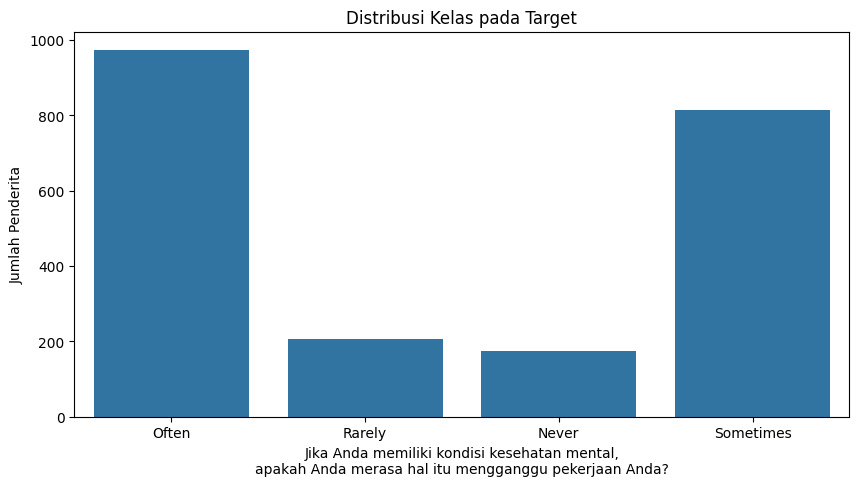

In [33]:
# Visualisasi Distribusi Penderita Diabetes (Target)
data_vis = df.copy()

plt.figure(figsize=(10,5))
sns.countplot(data_vis, x='work_interfere')
plt.title("Distribusi Kelas pada Target")
plt.xlabel("Jika Anda memiliki kondisi kesehatan mental,\napakah Anda merasa hal itu mengganggu pekerjaan Anda?")
plt.ylabel("Jumlah Penderita")
plt.show()

# ***Feature Scaling***

**Feature Scaling:** Penyesuaian Rentang Nilai pada Fitur-Fitur Numerik agar semua fitur dalam rentang yang seragam.

*Bagaimana jika nilai pada fitur-fitur yang kita punya tidak dalam rentang nilai yang sama?*

Misalkan ada fitur
- BMI: Skala nilai 12-98
- MentalHealth: Skala nilai 0-30
- Smoker: Biner 0 dan 1 (Ya/Tidak)

Algoritma akan mengira bahwa BMI adalah Fitur paling penting/berkontribusi karena memiliki nilai fitur yang lebih besar daripada fitur fitur lainnya padahal belum tentu fitur BMI paling penting/paling mempengaruhi nilai target. Maka ***Feature Scaling*** ini memastikan **agar semua fitur dapat berkontribusi dengan seimbang** dalam proses training model.

**Alasan memakai Normalization** (MinMaxScaler), karena nilai fitur pada dataset kebanyakan biner 0/1, maka dari itu akan lebih bagus jika menyesuaikan nilai skala fitur menjadi [0, 1].

> Skala nilai Fitur akan sangat berpengaruh pada algoritma berbasis jarak atau kemiripan antar data







In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Diabetes_binary']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns.drop('Diabetes_binary'))

data_scaled['Diabetes_binary'] = data['Diabetes_binary']

data_scaled.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,0.190493,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,0.377848,0.106159,0.141403,0.168224,0.440342,0.586010,0.810087,0.721982,0.139333
std,0.494934,0.494210,0.189571,0.076845,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,0.267119,0.247095,0.290598,0.374066,0.496429,0.254518,0.197155,0.295878,0.346294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429,0.000000
50%,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143,0.000000
75%,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Hybrid Sampling***

**SMOTEENN (Syntethic Minority Over-sampling Technique & Edited Nearest Neighbors)**:

metode gabungan antara Over-Sampling (SMOTE) dengan Under-Sampling (ENN). Metode ini memastikan agar model bisa memiliki kesempatan yang seimbang dalam mempelajari kelas minoritas.

Cara kerja Metode SMOTEENN:
- Fase SMOTE (The Creator)

    Menciptakan Data Minoritas Baru diantara Data Minoritas lainnya yang berdekatan (Iterpolasi). Pemasalahannya seringkali metode ini menciptakan titik data minoritas yang sangat berdekatan dengan data mayoritas atau bahkan ada data minoritas yang nyasar di tengah tengah kerumunan data mayoritas.

- Fase ENN (The Cleaner)

    Setelah fase SMOTE sudah, ENN masuk sebagai tukang bersih bersih. ENN mengecek Data Asli maupun Buatan. Jika ada Data minoritas/mayoritas yang ada di kerumunan Data lawan nya, ENN akan menganggap itu noise dan ENN akan menghapusnya.


In [ ]:
X = data_scaled.drop(columns=['Diabetes_binary'])
y = data_scaled['Diabetes_binary']

In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

print("Jumlah kelas sebelum oversampling:", Counter(y))
print("Jumlah kelas setelah oversampling:", Counter(y_resampled))

Jumlah kelas sebelum oversampling: Counter({0.0: 218334, 1.0: 35346})
Jumlah kelas setelah oversampling: Counter({1.0: 185263, 0.0: 145088})


## **Visualisasi Setelah SMOTE dan Data Manipulation**

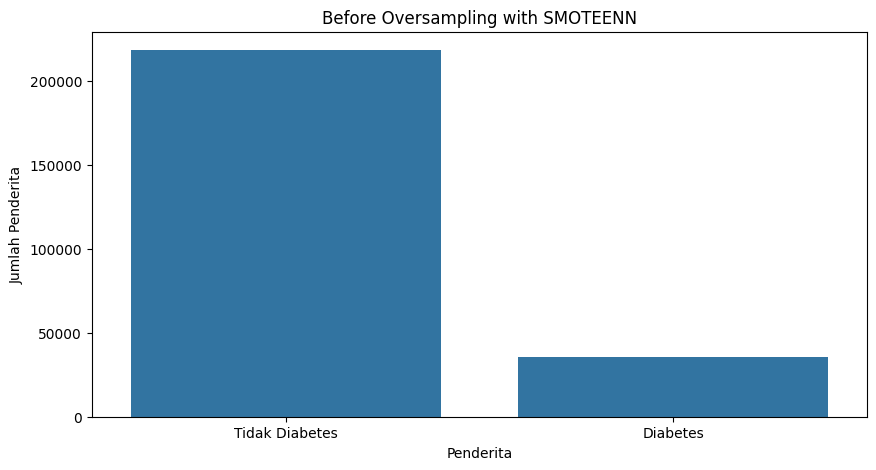

In [ ]:
y_vis = y.copy()
y_vis = y.map(nama_target)

plt.figure(figsize=(10,5))
sns.barplot(data=y_vis.value_counts())
plt.title("Before Oversampling with SMOTEENN")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

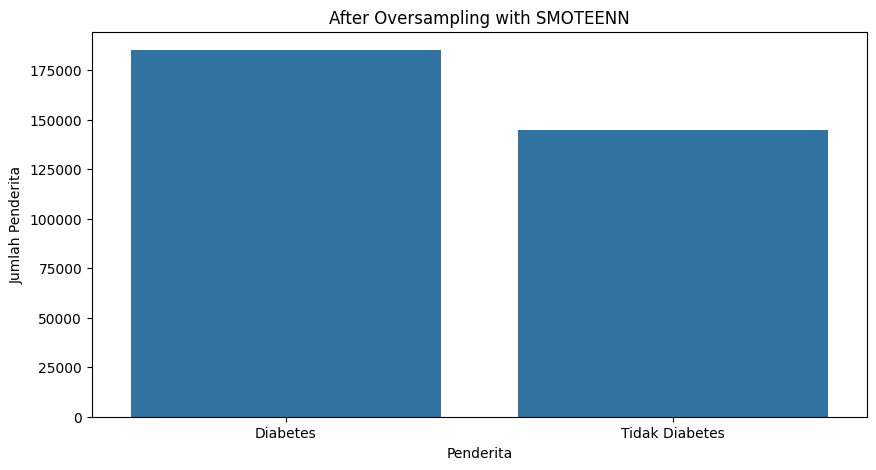

In [ ]:
y_vis2 = y_resampled.copy()
y_vis2 = y_resampled.map(nama_target)

plt.figure(figsize=(10,5))
sns.barplot(data=y_vis2.value_counts())
plt.title("After Oversampling with SMOTEENN")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

# ***Model Selection***

In [36]:
pip install xgboost

Training Accuracy: 0.9937
Validation Accuracy (Mean CLT): 0.4889
95% Confidence Interval: [0.3400 - 0.6400]


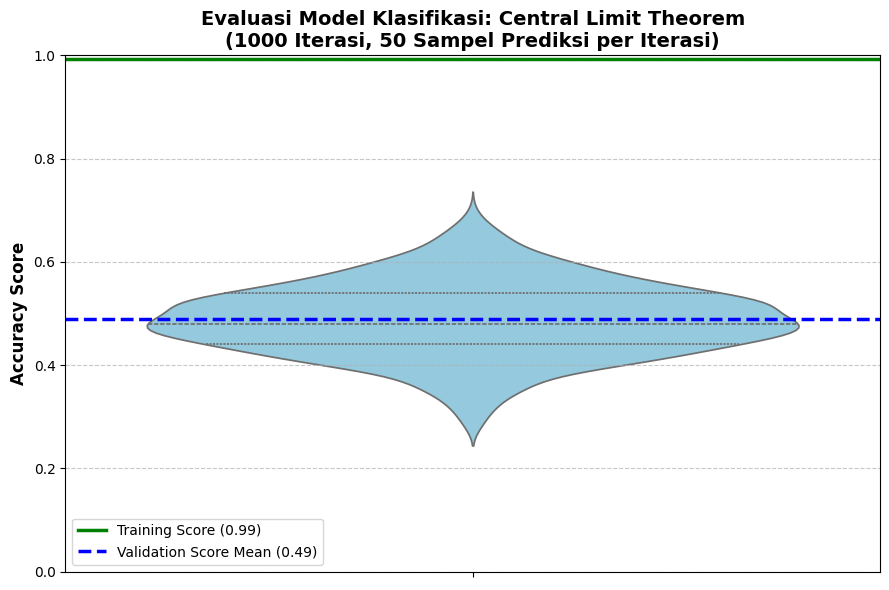

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Wajib menggunakan Pipeline dari imblearn (bukan sklearn) agar kompatibel dengan SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# 1. Load Data
df = pd.read_csv('cleaned_osmi_data_extended.csv')

# 2. Pembersihan Akhir Kolom (Menghapus atribut yang memicu noise / mayoritas NaN)
cols_to_drop = ['Year', 'mental_health_consequence', 'phys_health_consequence', 'obs_consequence']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 3. Pisahkan Fitur Prediktor (X) dan Target Label (y)
X = df.drop('work_interfere', axis=1)
y = df['work_interfere']

# Memetakan target kategori menjadi numerik untuk kemudahan evaluasi (4 Kelas)
target_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3}
y_encoded = y.map(target_mapping)

# 4. Train/Test Split (Pemisahan Data 80/20)
# Pemisahan dilakukan SEBELUM Pipeline untuk menjamin 100% tidak ada Data Leakage!
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5. Membangun Pipeline Preprocessing (Penanganan Missing Values & Encoding Kategorikal)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = ['Age'] # Hanya Usia yang berupa angka asli

num_transformer = SimpleImputer(strategy='median')
cat_transformer = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputasi care_options yg kosong dengan modus
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

# 6. PIPELINE UTAMA (Preprocess -> SMOTE -> Random Forest)
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), # Menyeimbangkan kelas imbalanced (HANYA pada X_train)
    ('classifier', XGBClassifier(random_state=42))
])

# 7. Melatih Model (Training)
model_pipeline.fit(X_train, y_train)

# Cek performa model pada data pelatihan (Training)
y_train_pred = model_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# 8. EVALUASI BERBASIS CENTRAL LIMIT THEOREM (CLT) PADA DATA TEST
n_iterations = 1000
sample_size = 50
clt_accuracies = []

# Lakukan prediksi sekali secara utuh untuk mengefisienkan loop
y_test_pred = model_pipeline.predict(X_test)
test_results = pd.DataFrame({'actual': y_test.values, 'predicted': y_test_pred})

# Looping CLT (Bootstrapping Resampling)
np.random.seed(42)
for i in range(n_iterations):
    # Mengambil sampel 50 prediksi secara acak dengan pengembalian (replace=True)
    sampled_data = test_results.sample(n=sample_size, replace=True)

    # Hitung akurasi pada sampel tersebut lalu kumpulkan
    acc = accuracy_score(sampled_data['actual'], sampled_data['predicted'])
    clt_accuracies.append(acc)

# Menghitung Rata-rata dan Confidence Interval (Interval Kepercayaan 95%)
mean_val_accuracy = np.mean(clt_accuracies)
ci_lower = np.percentile(clt_accuracies, 2.5)
ci_upper = np.percentile(clt_accuracies, 97.5)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy (Mean CLT): {mean_val_accuracy:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f} - {ci_upper:.4f}]")

# 9. VISUALISASI PERFORMA EVALUASI
plt.figure(figsize=(9, 6))

# Sumbu Y = Accuracy Score (Sesuai rumusan masalah: presisi orientasi Y-axis)
sns.violinplot(y=clt_accuracies, color='skyblue', inner='quartile')

# Garis Hijau (Training Score)
plt.axhline(y=train_accuracy, color='green', linestyle='-', linewidth=2.5,
            label=f'Training Score ({train_accuracy:.2f})')

# Garis Biru (Validation Score - Mean)
plt.axhline(y=mean_val_accuracy, color='blue', linestyle='--', linewidth=2.5,
            label=f'Validation Score Mean ({mean_val_accuracy:.2f})')

plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Evaluasi Model Klasifikasi: Central Limit Theorem\n(1000 Iterasi, 50 Sampel Prediksi per Iterasi)',
          fontsize=14, fontweight='bold')
plt.ylim(0.0, 1.0) # Akurasi selalu pada rentang 0 - 100% (1.0)
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## **Model Evaluation**

### **TUJUAN UTAMA:** ACCURACY SCORE > 0.95.
Metrik Evaluasi yang digunakan:
- Accuracy Score: Proporsi Prediksi yang Benar dari seluruh data yang diprediksi.
- Precision Score: Dari semua hasil prediksi yang positif, ada berapa banyak hasil prediksi yang benar benar positif.
- Recall Score: Dari semua yang benar benar positif, ada berapa banyak prediksi yang berhasil diprediksi positif
- F1-Score: Rata-Rata Harmoni antara Precision dan Recall
- Confusion Matrix: Untuk melihat hasil prediksi (TP, TN, FP, FN)
- ROC Curve dan AUC: Untuk menilai seberapa baik model dalam membedakan mana yang benar-benar sakit dan mana yang tidak.

In [ ]:
results = {
    'Decision Tree' : confusion_matrix(y_test, dtc.predict(X_test)),
    'Naive Bayes' : confusion_matrix(y_test, nb.predict(X_test)),
    'KNN' : confusion_matrix(y_test, knn.predict(X_test))
}

results

{'Decision Tree': array([[26423,  2627],
        [ 2384, 34637]]),
 'Naive Bayes': array([[24368,  4682],
        [ 7488, 29533]]),
 'KNN': array([[27593,  1457],
        [  184, 36837]])}

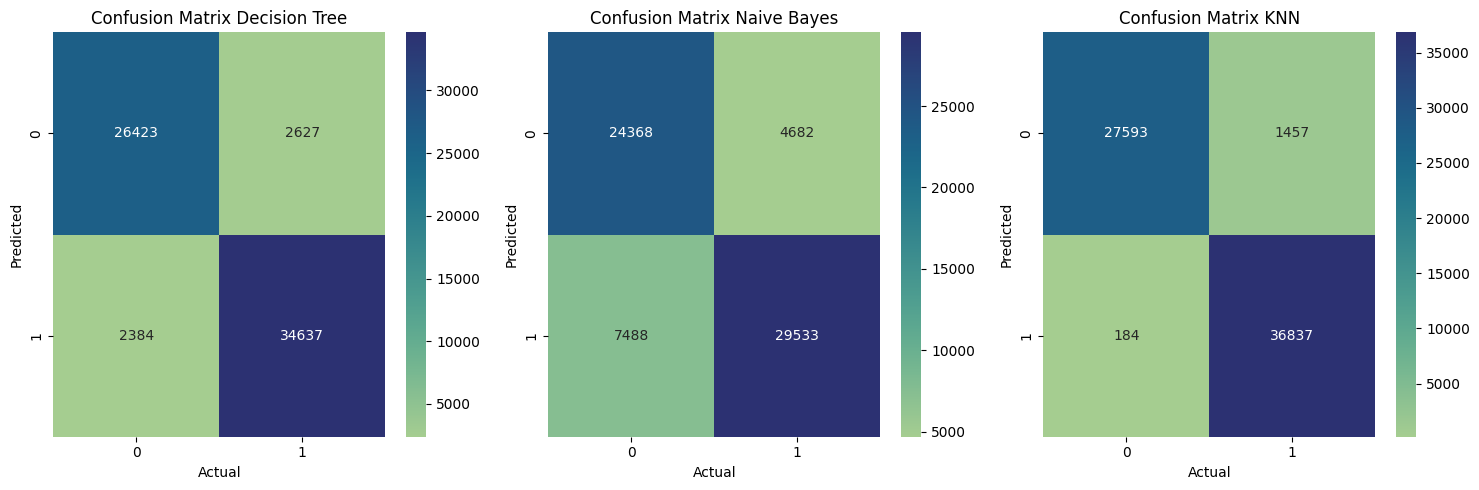

In [ ]:
n_vars = 3
n_row = 1
n_cols = 3

fig, axes = plt.subplots(n_row, n_cols, figsize=(15, 5))
axes.flatten()

for i, (model_name, cm) in enumerate(results.items()):
  sns.heatmap(cm, annot=True, fmt='g', cmap='crest', ax=axes[i])
  axes[i].set_title(f"Confusion Matrix {model_name}")
  axes[i].set_xlabel(f"Actual")
  axes[i].set_ylabel(f"Predicted")

plt.tight_layout()
plt.show()

**Ringkasan Hasil Evaluasi:**

> ### **Decision Tree**
> - Acccuracy Score   : **92%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **99%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model sangat seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)

> ### **Naive Bayes**
> - Acccuracy Score   : **81%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **94%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model cukup seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)

> ### **K-Nearest Neighbor**
> - Acccuracy Score   : **97%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **99%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model sangat seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)



In [ ]:
def roc_auc_evaluation(model, X_test, y_test):

  y_prob = model.predict_proba(X_test)[:, 1]

  roc_auc = roc_auc_score(y_test, y_prob)
  print("AUC Score:", roc_auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob)

  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{model.__class__.__name__}')
  plt.legend(loc="lower right")
  plt.show()

  # return fpr, tpr, thresholds


AUC Score: 0.9225869119917565


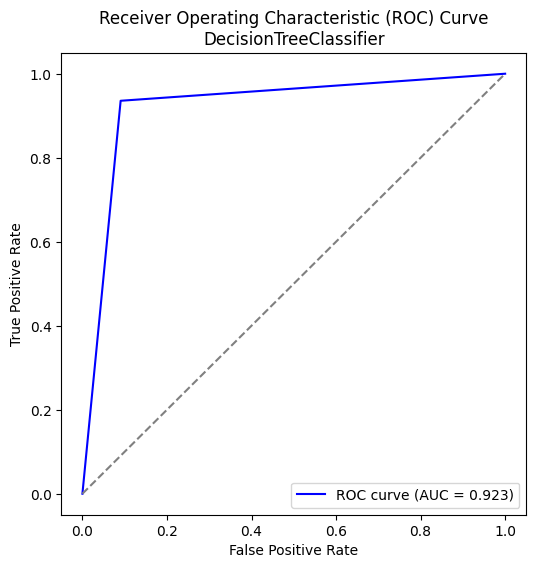



AUC Score: 0.8881520619943065


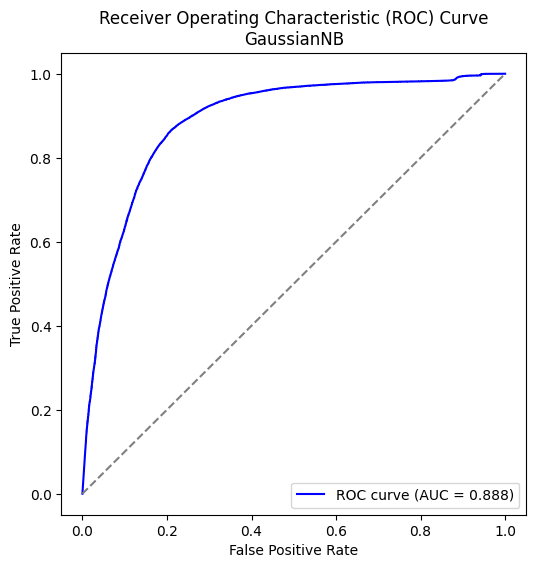



AUC Score: 0.9893532758376287


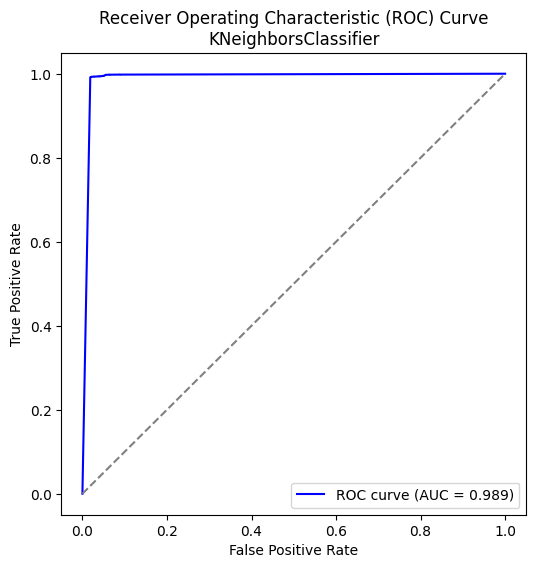

In [ ]:
model_list = [dtc, nb, knn]

for model in model_list:
  roc_auc_evaluation(model, X_test, y_test)
  print("\n")

**Ringkasan Hasil Evaluasi ROC & AUC:**

ROC (Receiver Operating Characteristic) adalah Kurva yang menunjukkan performa model dalam membedakan kedua kelas (Diabetes dan Tidak Diabetes)

AUC (Area Under Curve) adalah nilai yang memberikan peluang model dalam memprediksi orang yang benar-benar sakit lebih tinggi daripada peluan model dalam memprediksi orang yang benar-benar sehat.

> ### **Decision Tree**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat meningkat signifikan di titik ketika **TPR = ~0.9** & **FPR = ~0.1**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah dangat sedikit seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **92&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model sudah cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.

> ### **Naive Bayes**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat di titik ketika **TPR = ~0.8** & **FPR = ~0.1**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah sedikit secara pelan seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **88&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model sudah cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.

> ### **K-Nearest Neighbor**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat meningkat sangat signifikan di titik ketika **TPR = ~0.9** & **FPR = ~0**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah sedikit seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **99&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model belum cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.